# ***2.i***

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving A2Data_train.csv to A2Data_train.csv


In [ ]:
#loading the data into the data frame
import pandas as pd
data=pd.read_csv("A2Data_train.csv")
data.head()

,0.58351,0.37939,0.83975,0.086861,0.61192,0.39203,0.18964,0.58509,0.89494,0.39385,...,0.51706,0.20535,0.82999,0.24995,0.3198,0.19674,0.95855,0.84948,0.92369,1.9741
0,0.86622,0.45135,0.93479,0.23581,0.50488,0.49742,0.117220,0.574880,0.71051,0.336890,...,0.27412,0.460650,0.655440,0.56656,0.49062,0.19920,0.320680,0.41419,0.83023,2.3354
1,0.39142,0.91995,0.13873,0.99181,0.54367,0.98449,0.340260,0.206470,0.40131,0.128990,...,0.27247,0.389110,0.799490,0.57753,0.86682,0.69741,0.628630,0.29479,0.54280,2.2053
2,0.79553,0.27854,0.22890,0.78929,0.49222,0.67084,0.769410,0.057104,0.20393,0.086936,...,0.24901,0.659760,0.943350,0.41246,0.92715,0.11015,0.101310,0.66801,0.34573,2.0400
3,0.65223,0.96665,0.17985,0.35406,0.84042,0.92891,0.014597,0.229530,0.43920,0.548940,...,0.93277,0.236740,0.027077,0.27111,0.23366,0.56356,0.047289,0.62792,0.97930,2.2053
4,0.71868,0.66333,0.29789,0.45105,0.42763,0.15868,0.932240,0.989020,0.65957,0.317730,...,0.57039,0.067598,0.086989,0.59925,0.83566,0.89472,0.399830,0.32986,0.40907,2.7347


In [ ]:
features= data.loc[ : , data.columns != '1.9741']
labels=data.loc[ : , data.columns== '1.9741']
import numpy as np
x=np.array(features)
y=np.array(labels)

let us try our first ridge regression with parameter lamda=1

In [ ]:
lamda=1
I=np.identity(100)
I[0][0]=0
penalty=lamda*I

trying with gradient descent

In [ ]:
w=np.random.rand(100,1)
for i in range(150000):
  grad=(x.T@x)@w-x.T@y+lamda*w
  w=w-0.0000001*grad

In [ ]:
print("the w obatined with regularisation with lambda =1 is",w)

the w obatined with regularisation with lambda =1 is [[-7.78766446e-03]
 [-1.35737654e-02]
 [-3.64825974e-03]
 [ 2.75144825e-03]
 [ 1.88330393e-01]
 [ 2.71192444e-03]
 [ 9.55013884e-03]
 [ 1.79616726e-01]
 [ 3.75029371e-03]
 [ 4.99093429e-01]
 [ 8.46843805e-03]
 [ 4.28975771e-03]
 [ 1.42157547e-02]
 [ 4.01991297e-03]
 [ 9.41624642e-03]
 [-1.15712623e-03]
 [ 3.37498768e-03]
 [ 1.28508757e-03]
 [-9.27087753e-03]
 [-2.41248874e-03]
 [-1.17390451e-02]
 [-1.01503270e-02]
 [ 7.95936786e-03]
 [-9.96011257e-03]
 [ 6.08167675e-03]
 [-4.59167450e-03]
 [-2.99745370e-03]
 [ 8.26728252e-03]
 [ 1.20748562e-02]
 [-6.83345358e-03]
 [-8.51827158e-03]
 [ 1.11070397e-03]
 [ 5.03287704e-03]
 [ 5.96973275e-03]
 [-1.34765329e-02]
 [ 1.03118622e-03]
 [ 1.32571522e-02]
 [-1.13356811e-02]
 [-1.99577368e-02]
 [ 5.84401526e-01]
 [ 5.31159679e-04]
 [-7.77506700e-04]
 [-2.63566190e-03]
 [-9.55954615e-03]
 [-5.32759052e-03]
 [ 9.85549424e-03]
 [-6.77274158e-03]
 [-3.76850794e-04]
 [ 7.07701010e-03]
 [ 3.16285984e-0

# ***2.ii***

In [ ]:

err=[]
lam=[10**i for i in range(-5,5)]
for i in lam:
  error=0
  I=np.identity(100)
  I[0][0]=0
  p=i*I
  #1st fold
  x_tr,y_tr=x[2000:],y[2000:]
  x_test,y_test=x[:2000],y[:2000]
  w_r=np.linalg.inv((x_tr.T@x_tr+p))@x_tr.T@y_tr
  error+=int((x_test@w_r-y_test).T@(x_test@w_r-y_test))
  #2nd fold
  x_tr,y_tr=np.delete(x, slice(2000, 4000), axis=0),np.delete(y, slice(2000, 4000), axis=0)
  x_test,y_test=x[2000:4000],y[2000:4000]
  w_r=np.linalg.inv((x_tr.T@x_tr+p))@x_tr.T@y_tr
  error+=int((x_test@w_r-y_test).T@(x_test@w_r-y_test))
  #3rd fold
  x_tr,y_tr=np.delete(x, slice(4000,6000), axis=0),np.delete(y, slice(4000,6000), axis=0)
  x_test,y_test=x[4000:6000],y[4000:6000]
  w_r=np.linalg.inv((x_tr.T@x_tr+p))@x_tr.T@y_tr
  error+=int((x_test@w_r-y_test).T@(x_test@w_r-y_test))
  #4th fold
  x_tr,y_tr=np.delete(x, slice(6000,8000), axis=0),np.delete(y, slice(6000,8000), axis=0)
  x_test,y_test=x[6000:8000],y[6000:8000]
  w_r=np.linalg.inv((x_tr.T@x_tr+p))@x_tr.T@y_tr
  error+=int((x_test@w_r-y_test).T@(x_test@w_r-y_test))
  #5th fold
  x_tr,y_tr=x[:8000],y[:8000]
  x_test,y_test=x[8000:],y[8000:]
  w_r=np.linalg.inv((x_tr.T@x_tr+p))@x_tr.T@y_tr
  error+=int((x_test@w_r-y_test).T@(x_test@w_r-y_test))
  err.append(error/5)


Text(0.5, 1.0, 'lambda vs error plot')

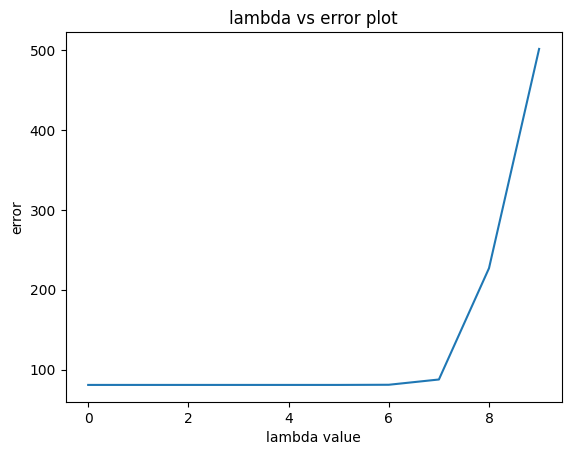

In [ ]:
import matplotlib.pyplot as plt
plt.plot(err)
plt.xlabel('lambda value')
plt.ylabel('error')
plt.title("lambda vs error plot")

we see that any thing befor 7 gives more or less the same avg error.so we can take any value less than 7 as our optimum lambda

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving A2Data_test.csv to A2Data_test.csv


In [ ]:
#loading the data into the data frame
import pandas as pd
test_data=pd.read_csv("A2Data_test.csv")
test_data.head()

,0.21302,0.44621,0.51432,0.21975,0.49544,0.46367,0.26007,0.28137,0.98382,0.0077697,...,0.9291,0.28669,0.45841,0.78874,0.041794,0.58736,0.90491,0.91718,0.68321,2.0121
0,0.32563,0.703990,0.31970,0.045240,0.86968,0.13136,0.47664,0.26632,0.334520,0.81200,...,0.51868,0.25546,0.29498,0.008869,0.16997,0.92325,0.42134,0.909060,0.61539,1.8164
1,0.49539,0.623570,0.58121,0.879160,0.93096,0.20304,0.35752,0.31232,0.066225,0.46389,...,0.85782,0.50530,0.32361,0.693090,0.69043,0.01604,0.46741,0.673030,0.60459,1.6435
2,0.88875,0.013187,0.87982,0.858160,0.79392,0.79239,0.76522,0.85145,0.233610,0.57924,...,0.25535,0.38341,0.55130,0.727730,0.67689,0.84605,0.61116,0.585140,0.41724,2.7451
3,0.15178,0.540760,0.26896,0.006752,0.10102,0.34208,0.86855,0.32698,0.285460,0.80503,...,0.54955,0.12932,0.94848,0.326100,0.26801,0.27125,0.53535,0.918720,0.16801,1.8932
4,0.20625,0.432600,0.78560,0.323200,0.38977,0.92770,0.77007,0.49772,0.425030,0.52786,...,0.46283,0.56845,0.79269,0.420230,0.16959,0.40514,0.11409,0.025962,0.93493,2.4248


In [ ]:
test_features= test_data.loc[ : , test_data.columns != '2.0121']
test_labels=test_data.loc[ : , test_data.columns== '2.0121']
import numpy as np
x_test=np.array(test_features)
y_test=np.array(test_labels)

finding the w_ml

In [ ]:
w_ml=np.linalg.inv(x.T@x)@x.T@y
error1=(x_test@w_ml-y_test).T@(x_test@w_ml-y_test)
print("test error for w_ml is",error1)


test error for w_ml is [[185.35534882]]


finding w_r with lamda=7

In [ ]:
I=np.identity(100)
I[0][0]=0
p=7*I
w_r=np.linalg.inv((x_tr.T@x_tr+p))@x_tr.T@y_tr
error2=(x_test@w_r-y_test).T@(x_test@w_r-y_test)
print("test error for w_r with labda=7 is",error2)

test error for w_r with labda=7 is [[184.20013743]]


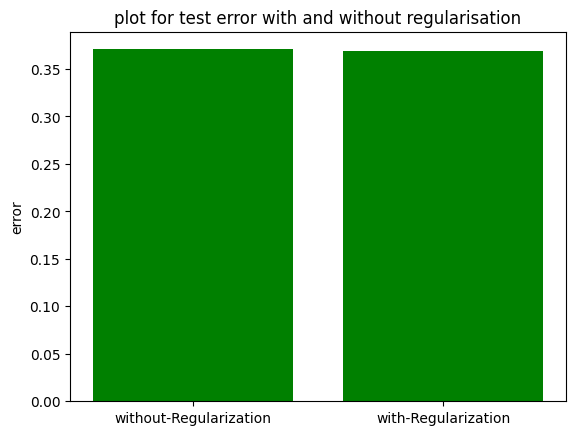

In [ ]:
x_label=['without-Regularization','with-Regularization']
plt.bar(x_label,[float(error1)/500,float(error2)/500],color='g')#normalising the error eith no of test samples
plt.ylabel("error")
plt.title("plot for test error with and without regularisation")
plt.show()